<font size=6>금리(interest_rates)</b></font>

<font size=6><b>금리</b></font>
* ref [2021년 1월 금융기관 가중평균금리] : https://www.bok.or.kr/portal/bbs/P0000559/view.do?nttId=10063199&menuNo=200690&pageIndex=1
* ref [2022년 1월 금융기관 가중평균금리] : https://www.bok.or.kr/portal/bbs/P0000559/view.do?nttId=10069319&menuNo=200690
* ref : https://www.ytn.co.kr/_ln/0102_201910301518564398
* ref [ECOS] : https://ecos.bok.or.kr/#/

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()

import warnings
warnings.filterwarnings(action='ignore')

# numeric_level = getattr(logging, 'INFO', None)
# logging.basicConfig(level=numeric_level, format='%(asctime)s %(levelname)-8s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


plt.rc('font', family='Malgun Gothic')

# 금리

## 기준금리, 시장금리

* <b>기준금리</b>
    * 금리 체계의 기준이 되는 정책금리
    * 한국은행 소속 기관인 금융통화위원회에서 1년에 8회 결정 회의를 갖음
* 시장금리
    정책금리를 제외한 모든 금리

## 통화 및 유동성 지표

* <b>본원통화 (本源通貨, Reserve Base , monetary base 또는 base money) : 중앙은행 화폐발행액, 시중은행으로 보낸 돈
  - 현금통화 + 예금은행시재금 + 중앙은행 지급준비예치금<br>
* 시장에 풀린 본원통화는 크게 다음 두가지 방식으로 유통된다.
   - <b>현금통화 </b> : 현금의 형태로 실제 시장에 풀려 유통
   - <b>지급준비금</b> : 시중은행으로 흘러들어가는 돈      

* 통화지표 <br>
   (예) 초기에 10일은 4만원 입금,  이 후 20일은 6만원 입금
  - <b>평잔</b> : ( ( 40,000 * 10일 ) + ( 60,000 * 20일 ) ) / 30일 = 80,000원
  - <b>말잔</b> : 10만원
  - 통상적으로는 평잔보다 말잔이 높다
 <table>
    <tr>
        <td><img width=700 src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcZmxkR%2FbtqUeiF5uad%2FNk4LaGuEczfLzPYlsh0rJK%2Fimg.png'></td>
        <td><img width=700 src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Few5rPj%2FbtqUeXhn0Ih%2F7fbSacPBHtreGVgdGF2MfK%2Fimg.png'></td>
    </tr>
</table>
          

In [2]:
df = pd.read_csv('./datasets/lec02_금리_1.csv', 
                 encoding='cp949', 
                 thousands=',',
                 header=[0,1,2,3], 
                 skipfooter=5, # 하단의 각주 5줄을 읽지마    #skiprows=[0,2],   
                 #date_parser=['항목명1']
                )
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   (통계표, 항목명1, 단위, 변환)                                      11 non-null     int64  
 1   (1.2.1.2 본원통화 구성내역(말잔,원계열), 본원통화(말잔,원계열), 십억원 , 원자료)     11 non-null     float64
 2   (1.2.1.2 본원통화 구성내역(말잔,원계열), 현금통화, 십억원 , 원자료)             11 non-null     float64
 3   (1.2.1.2 본원통화 구성내역(말잔,원계열), 중앙은행 대 예금취급기관부채, 십억원 , 원자료)  11 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 480.0 bytes
None


통계표 1.2.1.2 본원통화 구성내역(말잔,원계열)                          
    항목명1              본원통화(말잔,원계열)      현금통화 중앙은행 대 예금취급기관부채
      단위                      십억원       십억원             십억원 
      변환                       원자료       원자료             원자료
6   2017                  155881.0   96842.8         59038.2
7   2018                  172353.3  103994.8         68358.5
8   2019                  191829.3  114523.9         77305.4
9   2020                  221503.7  136152.6         85351.1
10  2021                  248785.5  156264.2         92521.4

In [3]:
df.columns = df.columns.droplevel([0,2,3]) # 헤더(컬럼)있는 부분 

In [4]:
df.head()   # 중앙은행 대 예금취급기관부채 -> 지급 준비금

,항목명1,"본원통화(말잔,원계열)",현금통화,중앙은행 대 예금취급기관부채
0,2011,80055.9,39609.1,40446.8
1,2012,88342.0,44173.8,44168.2
2,2013,104262.0,53316.2,50945.8
3,2014,116793.7,64438.5,52355.2
4,2015,131438.8,76343.4,55095.4


In [5]:
df['항목명1'] = pd.to_datetime(df['항목명1'], format='%Y').dt.year
df = df.set_index('항목명1')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2011 to 2021
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   본원통화(말잔,원계열)     11 non-null     float64
 1   현금통화             11 non-null     float64
 2   중앙은행 대 예금취급기관부채  11 non-null     float64
dtypes: float64(3)
memory usage: 352.0 bytes
None


,"본원통화(말잔,원계열)",현금통화,중앙은행 대 예금취급기관부채
항목명1,,,
2011,80055.9,39609.1,40446.8
2012,88342.0,44173.8,44168.2
2013,104262.0,53316.2,50945.8
2014,116793.7,64438.5,52355.2
2015,131438.8,76343.4,55095.4


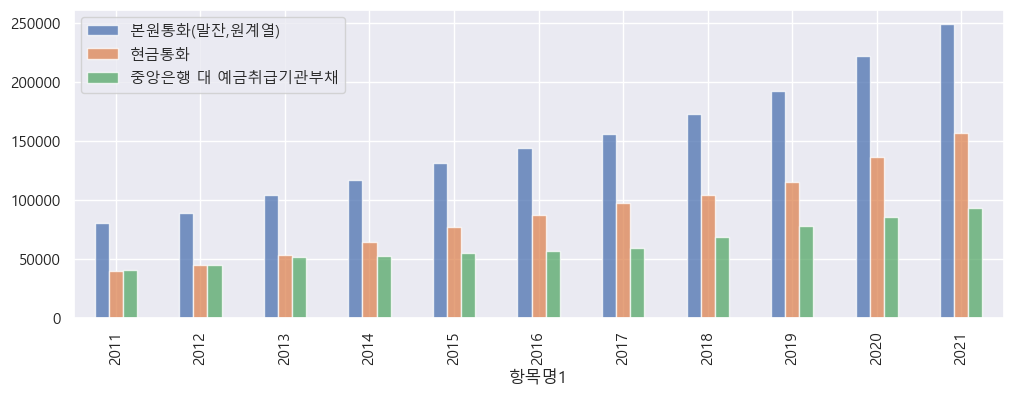

In [6]:
df.plot(kind='bar', alpha=0.75, figsize=(12,4))
plt.xticks(rotation=90)
plt.show()


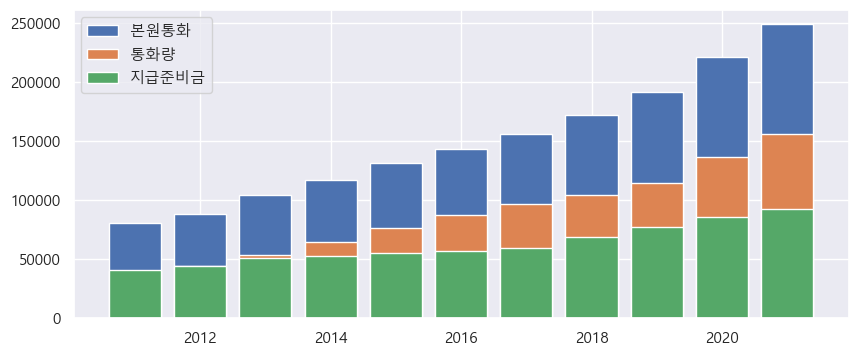

In [7]:
plt.rcParams["figure.figsize"] = (10, 4)
plt.bar(df.index, df['본원통화(말잔,원계열)'], label='본원통화')
plt.bar(df.index, df['현금통화'], label='통화량')
plt.bar(df.index, df['중앙은행 대 예금취급기관부채'], label='지급준비금')
plt.legend()
plt.show()

# [실습] 금리 변동에 따른 금융 시장의 변화

## Data Load
* 18.1.1.3 중앙은행 정책금리
* 8.8.2.1 주요국통화의 대원화 환율 통계자료원
* 4.1.2 시장금리(월,분기,년)
* 4.2.1 수신금리, 4.2.2 대출금리

In [8]:
df = pd.read_csv('./datasets/lec02_금리_2.csv', 
                 encoding='cp949', 
                 thousands=',',
                 header=[0,1,2,3,4], 
                 skipfooter=26,  #skiprows=[0,2]
                )
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   (통계표, 항목명1, 항목명2, 단위, 변환)                                       134 non-null    object 
 1   (8.8.2.1 주요국통화의 대원화 환율 통계자료, 원/미국달러(매매기준율), 말일자료, 원 , 원자료)      134 non-null    float64
 2   (8.8.2.1 주요국통화의 대원화 환율 통계자료, 원/위안(매매기준율), 말일자료, 원 , 원자료)        74 non-null     float64
 3   (8.8.2.1 주요국통화의 대원화 환율 통계자료, 원/일본엔(100엔), 말일자료, 원 , 원자료)        134 non-null    float64
 4   (4.1.2 시장금리(월,분기,년), CD(91일), Unnamed: 4_level_2, 연%, 원자료)      134 non-null    float64
 5   (4.1.2 시장금리(월,분기,년), CP(91일), Unnamed: 5_level_2, 연%, 원자료)      134 non-null    float64
 6   (4.1.2 시장금리(월,분기,년), 국고채(5년), Unnamed: 6_level_2, 연%, 원자료)      134 non-null    float64
 7   (4.1.2 시장금리(월,분기,년), 국고채(50년), Unnamed: 7_level_2, 연%

통계표 8.8.2.1 주요국통화의 대원화 환율 통계자료                          \
     항목명1              원/미국달러(매매기준율) 원/위안(매매기준율) 원/일본엔(100엔)   
     항목명2                       말일자료        말일자료        말일자료   
       단위                         원           원           원    
       변환                        원자료         원자료         원자료   
0  Jan-11                     1114.3         NaN     1356.59   
1  Feb-11                     1127.9         NaN     1380.96   
2  Mar-11                     1107.2         NaN     1331.89   
3  Apr-11                     1072.3         NaN     1313.77   
4  May-11                     1080.6         NaN     1335.56   

  4.1.2 시장금리(월,분기,년)                                                           \
             CD(91일)            CP(91일)            국고채(5년)           국고채(50년)   
  Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2 Unnamed: 7_level_2   
                  연%                 연%                 연%                 연%   
                 원자료                원자료                원자료                원자료   
0               2.93               3.12               4.30                NaN   
1               3.13               3.31               4.41                NaN   
2               3.35               3.53               4.13                NaN   
3               3.40               3.54               4.10                NaN   
4               3.46               3.58               3.97                NaN   

                     18.1.1.3 중앙은행 정책금리                      \
           통안증권(91일)                 한국                  중국   
  Unnamed: 8_level_2 Unnamed: 9_level_2 Unnamed: 10_level_2   
                  연%                 %                   %    
                 원자료                원자료                 원자료   
0               2.80               2.75                5.81   
1               3.10               2.75                6.06   
2               3.26               3.00                6.06   
3               3.32               3.00                6.31   
4               3.35               3.00                6.31   

                                             4.2.1.1 신규취급액 기준  \
                   일본                  미국               저축성수신   
  Unnamed: 11_level_2 Unnamed: 12_level_2 Unnamed: 13_level_2   
                   %                   %                   연%   
                  원자료                 원자료                 원자료   
0                0.05                0.13                3.46   
1                0.05                0.13                3.62   
2                0.05                0.13                3.67   
3                0.05                0.13                3.68   
4                0.05                0.13                3.67   

     4.2.2.1 신규취급액 기준                      2.5.한국은행 원화대출금(말잔)  
                 기업대출                가계대출            원화대출금(계)  
  Unnamed: 14_level_2 Unnamed: 15_level_2 Unnamed: 16_level_2  
                 연리%                 연리%                 십억원   
                  원자료                 원자료                 원자료  
0                5.71                5.30             17001.3  
1                5.81                5.26             17246.8  
2                5.96                5.41             17398.3  
3                5.80                5.42             20289.9  
4                5.83                5.49             23623.0

In [9]:
df.columns = df.columns.droplevel([0,2,3,4])

In [10]:
df = df.set_index(df.iloc[:, 0])
df.head()

,항목명1,원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),CD(91일),CP(91일),국고채(5년),국고채(50년),통안증권(91일),한국,중국,일본,미국,저축성수신,기업대출,가계대출,원화대출금(계)
항목명1,,,,,,,,,,,,,,,,,
Jan-11,Jan-11,1114.3,NaN,1356.59,2.93,3.12,4.30,NaN,2.80,2.75,5.81,0.05,0.13,3.46,5.71,5.30,17001.3
Feb-11,Feb-11,1127.9,NaN,1380.96,3.13,3.31,4.41,NaN,3.10,2.75,6.06,0.05,0.13,3.62,5.81,5.26,17246.8
Mar-11,Mar-11,1107.2,NaN,1331.89,3.35,3.53,4.13,NaN,3.26,3.00,6.06,0.05,0.13,3.67,5.96,5.41,17398.3
Apr-11,Apr-11,1072.3,NaN,1313.77,3.40,3.54,4.10,NaN,3.32,3.00,6.31,0.05,0.13,3.68,5.80,5.42,20289.9
May-11,May-11,1080.6,NaN,1335.56,3.46,3.58,3.97,NaN,3.35,3.00,6.31,0.05,0.13,3.67,5.83,5.49,23623.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, Jan-11 to Feb-22
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   항목명1           134 non-null    object 
 1   원/미국달러(매매기준율)  134 non-null    float64
 2   원/위안(매매기준율)    74 non-null     float64
 3   원/일본엔(100엔)    134 non-null    float64
 4   CD(91일)        134 non-null    float64
 5   CP(91일)        134 non-null    float64
 6   국고채(5년)        134 non-null    float64
 7   국고채(50년)       65 non-null     float64
 8   통안증권(91일)      134 non-null    float64
 9   한국             134 non-null    float64
 10  중국             134 non-null    float64
 11  일본             94 non-null     float64
 12  미국             134 non-null    float64
 13  저축성수신          133 non-null    float64
 14  기업대출           133 non-null    float64
 15  가계대출           133 non-null    float64
 16  원화대출금(계)       25 non-null     float64
dtypes: float64(16), object(1)
memory usage: 18.8+ KB


In [12]:
df.columns

Index(['항목명1', '원/미국달러(매매기준율)', '원/위안(매매기준율)', '원/일본엔(100엔)', 'CD(91일)',
       'CP(91일)', '국고채(5년)', '국고채(50년)', '통안증권(91일)', '한국', '중국', '일본', '미국',
       '저축성수신', '기업대출', '가계대출', '원화대출금(계)'],
      dtype='object')

## 주요 국가 금리 비교 

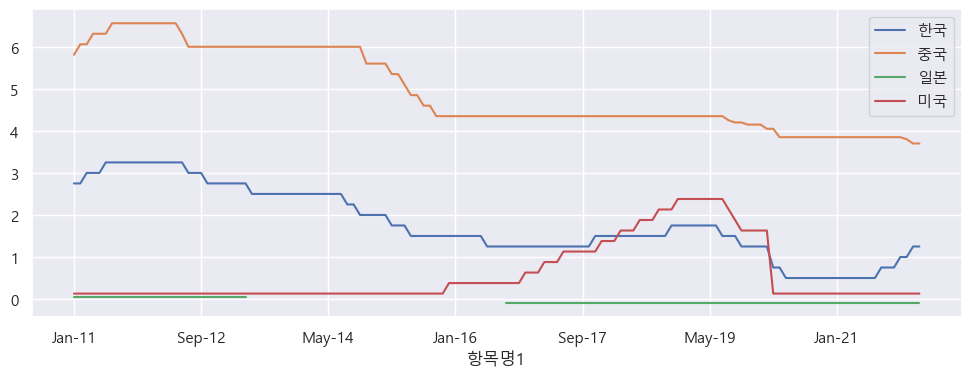

In [13]:
plt.rcParams["figure.figsize"] = (12, 4)
df[['한국', '중국', '일본', '미국']].plot()
plt.show()

## 시장금리

* <b>COFIX</b>(Cost of Funds Index): 8개 은행의 자금조달 관련 정보를 기초로 산출되는 자금조달비용지수
* <b>KORIBOR</b> : 은행간 만든 단기 기준금리
* 단기투자상품 CD, CP,PR
  - <b>CD</b>(Certificate of Deposit) : 양도성예금증서
  - <b>CP</b>(Commercial Paper) : 기업어음 
  - <b>RP</b>(Repurchase Agreements) : 환매조건부채권 

In [14]:
#-------기준금리에 따른 시장금리 변화 비교 ------------

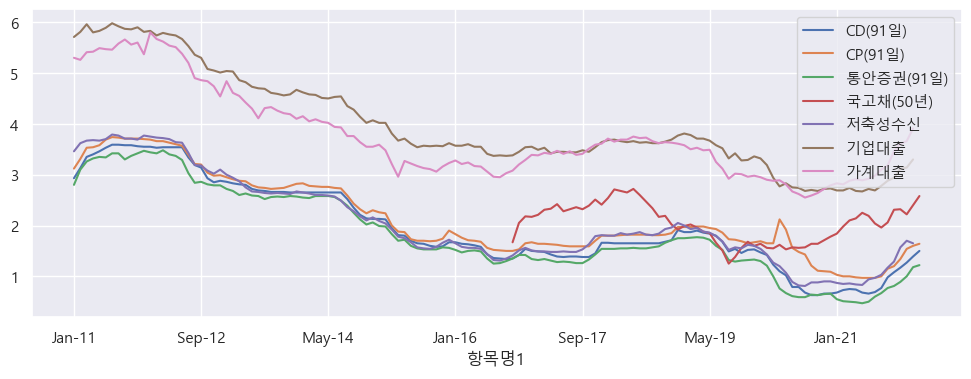

In [15]:
plt.rcParams["figure.figsize"] = (12, 4)
df[['CD(91일)','CP(91일)',  '통안증권(91일)','국고채(50년)','저축성수신', '기업대출', '가계대출']].plot()
plt.show()

In [16]:
df.columns

Index(['항목명1', '원/미국달러(매매기준율)', '원/위안(매매기준율)', '원/일본엔(100엔)', 'CD(91일)',
       'CP(91일)', '국고채(5년)', '국고채(50년)', '통안증권(91일)', '한국', '중국', '일본', '미국',
       '저축성수신', '기업대출', '가계대출', '원화대출금(계)'],
      dtype='object')

## 기준금리 변화에 따른 채권금리 변화율

<AxesSubplot: xlabel='항목명1'>

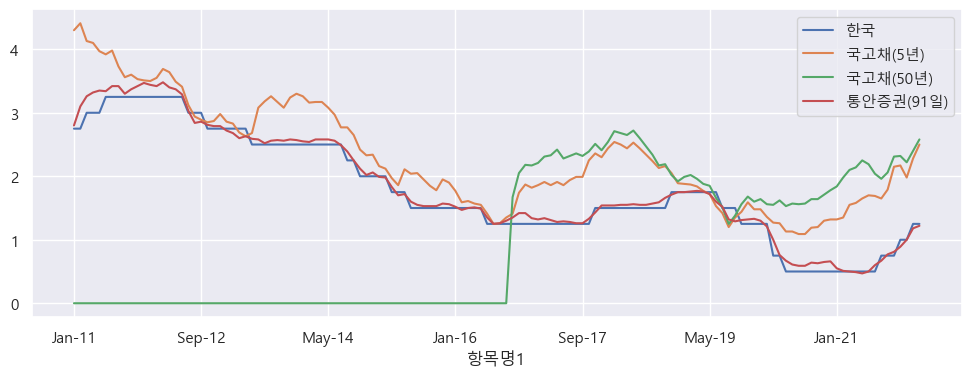

In [17]:
df[['한국','국고채(5년)','국고채(50년)', '통안증권(91일)']].fillna(0).plot()

## 기준금리 변화에 따른 대출 증감률

In [18]:
df = pd.read_csv('./datasets/lec02_금리_3.csv', 
                 encoding='cp949', 
                 thousands=',',
                 header=[0,1,3]
                )
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (통계표, 항목명1, 변환)                              134 non-null    object 
 1   (2.5.한국은행 원화대출금(말잔), 원화대출금(계), 전기대비증감률)      134 non-null    float64
 2   (2.6.한국은행 기준금리 및 여수신금리, 한국은행 기준금리, 전기대비증감률)  134 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.3+ KB
None


,통계표,2.5.한국은행 원화대출금(말잔),2.6.한국은행 기준금리 및 여수신금리
,항목명1,원화대출금(계),한국은행 기준금리
,변환,전기대비증감률,전기대비증감률
0,Jan-11,-5.0122,10.0000
1,Feb-11,0.0059,0.0000
2,Mar-11,-0.9772,9.0909
3,Apr-11,-3.9622,0.0000
4,May-11,-3.0950,0.0000


In [19]:
df.columns = df.columns.droplevel([0,2])
df = df.set_index('항목명1')
df.head()

,원화대출금(계),한국은행 기준금리
항목명1,,
Jan-11,-5.0122,10.0000
Feb-11,0.0059,0.0000
Mar-11,-0.9772,9.0909
Apr-11,-3.9622,0.0000
May-11,-3.0950,0.0000


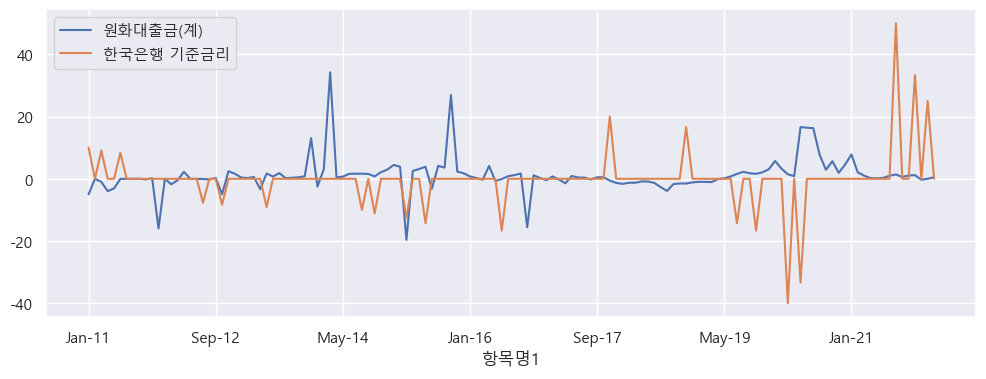

In [20]:
plt.rcParams["figure.figsize"] = (12, 4)
df.plot()
plt.show()